In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
glass = pd.read_csv("D:\\Assignment\\Assignment_13_KNN\\glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
glass.shape

(214, 10)

In [4]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
# unique values and counts
glass.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

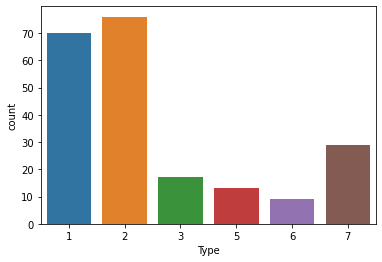

In [7]:
sns.countplot(glass['Type'])

# Feature Engineering

# Univariate

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [9]:
array = glass.values

In [10]:
x = array[0:,0:9]
y = array[:,-1]

In [11]:
x

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [12]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7.])

In [13]:
# Features extraction
test = SelectKBest(score_func =chi2, k=9)
fit = test.fit(x,y)

In [14]:
score = fit.scores_
score

array([4.81752628e-05, 4.31125331e+00, 1.00984212e+02, 1.69774883e+01,
       1.10449039e-01, 3.16706320e+01, 3.21092861e+00, 1.45514077e+02,
       2.17018493e+00])

In [15]:
score1 = pd.DataFrame(score ,columns = ["score"])
score1

,score
0,0.000048
1,4.311253
2,100.984212
3,16.977488
4,0.110449
5,31.670632
6,3.210929
7,145.514077
8,2.170185


In [16]:
# chi2 is less of RI .ie target veriables less dependent on RI

In [17]:
glass_1 = glass.drop("RI" ,axis =1)

In [18]:
glass_1

,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...
209,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# train test split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x1 = glass_1.iloc[:,0:9]
y1 = glass_1.iloc[:,-1]

In [21]:
y1

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

# Grid search for finding optimal number of Neighbors

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
n_neighbors =np.array(range(1,30))
param_grid = dict(n_neighbors=n_neighbors)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
grid =GridSearchCV(estimator=model ,param_grid=param_grid)
grid.fit(x1,y1)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [25]:
grid.best_score_

0.9627906976744185

In [26]:
grid.best_params_

{'n_neighbors': 1}

In [27]:
# we got best score with k nearest neighbor

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1, test_size = 0.20 ,random_state=3)

In [29]:
y_train

58     1
206    7
160    3
64     1
41     1
      ..
200    7
184    6
131    2
152    3
106    2
Name: Type, Length: 171, dtype: int64

In [30]:
y_test.shape

(43,)

# KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [33]:
y_pred = knn.predict(x_test)
y_pred

array([3, 1, 7, 2, 2, 7, 7, 2, 1, 7, 2, 2, 1, 3, 5, 2, 2, 7, 3, 2, 7, 7,
       2, 1, 3, 1, 7, 2, 1, 5, 1, 1, 5, 2, 1, 1, 2, 2, 6, 1, 6, 2, 1],
      dtype=int64)

In [34]:
y_pred.shape

(43,)

In [35]:
# Accuracy
np.mean(y_pred==y_test)

0.9534883720930233

In [36]:
knn.score(x_test ,y_test)

0.9534883720930233

In [37]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

In [38]:
cm = confusion_matrix(y_test ,y_pred)

In [39]:
cm

array([[12,  0,  0,  0,  0,  0],
       [ 0, 14,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  3,  0,  1],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  7]], dtype=int64)

# Heatmap

Text(69.0, 0.5, 'original')

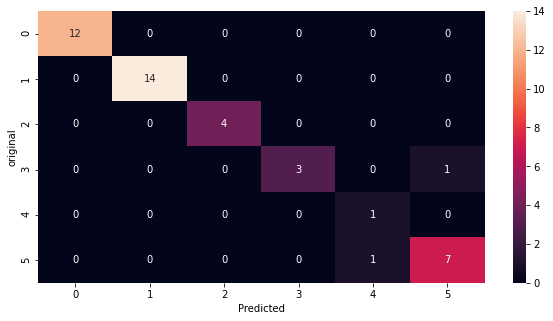

In [40]:
plt.figure(figsize=(10,5))
sns.heatmap(cm ,annot=True)
plt.xlabel("Predicted")
plt.ylabel("original")


In [41]:
# Diagonal value shows correct predictions
# Non-diagonal value shows wrong predictions